In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt

[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [111]:
# read the data
# input_dir = "/Users/arama1/Desktop/Accelerator/Data/Output/Reddit"

# all_files = pd.concat([
#     pd.read_csv(os.path.join(input_dir, file))
#     for file in os.listdir(input_dir)
#     if file.endswith('.csv')
# ])

# # equivalent
# # csv_files = []
# # for file in os.listdir(input_dir):
# #     if file.endswith('.csv'):
# #         file_path = os.path.join(input_dir, file)
# #         df = pd.read_csv(file_path)
# #         csv_files.append(df)
# # all_files = pd.concat(csv_files)

# # save the data
# all_files.to_csv('/Users/arama1/Desktop/Accelerator/Data/Output/Reddit/all_files.csv', index=False)


# read in data

In [112]:
all_files = pd.read_csv('/Users/arama1/Desktop/Accelerator/Data/Output/Reddit/all_files.csv')

In [113]:
#all_files = pd.read_csv('/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit/all_files.csv')

In [114]:
all_files.head()

id_submission name created_utc_submission  \
0         a321r  NaN    2009-11-11 00:44:34   
1         beu6w  NaN    2010-03-18 04:39:55   
2         chhhi  NaN    2010-06-21 21:33:37   
3         cjo99  NaN    2010-06-28 01:25:43   
4         cknwk  NaN    2010-06-30 19:47:49   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment body  \
0         [deleted]        NaN               NaN                 NaN  NaN   
1            _Kita_        NaN               NaN                 NaN  NaN   
2         drugsrbad        NaN               NaN                 NaN  NaN   
3          Deviant1        NaN               NaN                 NaN  NaN   
4        Bantam_Fox        NaN               NaN                 NaN  NaN   

  link_id parent_id author_comment  
0     NaN       NaN            NaN  
1     NaN       NaN            NaN  
2     NaN       NaN            NaN  
3     NaN       NaN            NaN  
4     NaN       NaN            NaN

In [115]:
# how many unique submission are there?
all_files.groupby(['subreddit_submission'])['id_submission'].nunique()


subreddit_submission
AskDocs              38
AskWomenOver30       20
Parenting            20
Supplements           1
TwoXChromosomes     419
birthcontrol        280
childfree          2587
healthcare            6
hysterectomy         33
medicine              7
truechildfree        54
Name: id_submission, dtype: int64

In [116]:
#number of unique comments (grouped by subreddit)?
all_files.groupby(['subreddit_comment'])['id_comment'].nunique()

subreddit_comment
AskDocs              109
AskWomenOver30       116
Parenting             91
Supplements            2
TwoXChromosomes     1649
birthcontrol         967
childfree          17147
healthcare            27
hysterectomy         112
medicine              33
truechildfree        303
Name: id_comment, dtype: int64

Is unique user ever a question? Does Reddit allow multiple entries for the same user?

In [117]:
# clean up the date time format
## Define the replacement function
def replace_value(x):
    if x == 't3_1sele2':
        return '2009-05-13 00:58:50'
    else:
        return x
    
all_files['created_utc_submission'] = all_files['created_utc_submission'].apply(replace_value)

In [118]:
# Convert the timestamp column to datetime
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])
all_files['created_utc_submission'] = pd.to_datetime(all_files['created_utc_submission']) 


In [119]:
print("Earliest comment:", all_files['created_utc_submission'].min())

print("Latest comment:", all_files['created_utc_submission'].max())

Earliest comment: 2009-05-13 00:58:50
Latest comment: 2022-12-30 17:11:37


In [120]:
# Group by subreddit and show date ranges
for subreddit in all_files['subreddit_submission'].unique():
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    print(f"\nSubreddit: {subreddit}")
    print("Earliest submission:", subreddit_data['created_utc_submission'].min())
    print("Latest submission:", subreddit_data['created_utc_submission'].max())


Subreddit: TwoXChromosomes
Earliest submission: 2009-11-11 00:44:34
Latest submission: 2022-12-30 17:11:37

Subreddit: nan
Earliest submission: NaT
Latest submission: NaT

Subreddit: truechildfree
Earliest submission: 2014-03-14 14:54:48
Latest submission: 2022-09-25 19:26:32

Subreddit: hysterectomy
Earliest submission: 2019-01-17 14:21:32
Latest submission: 2022-11-22 14:21:01

Subreddit: childfree
Earliest submission: 2010-08-04 17:15:16
Latest submission: 2022-12-29 22:15:41

Subreddit: healthcare
Earliest submission: 2016-01-25 10:12:26
Latest submission: 2021-03-25 18:40:35

Subreddit: Supplements
Earliest submission: 2021-12-26 18:11:36
Latest submission: 2021-12-26 18:11:36

Subreddit: AskWomenOver30
Earliest submission: 2014-01-03 20:32:38
Latest submission: 2022-09-02 16:31:12

Subreddit: medicine
Earliest submission: 2014-11-21 18:22:14
Latest submission: 2022-10-28 16:05:02

Subreddit: birthcontrol
Earliest submission: 2011-07-28 23:16:46
Latest submission: 2022-12-25 22:3

plot this?

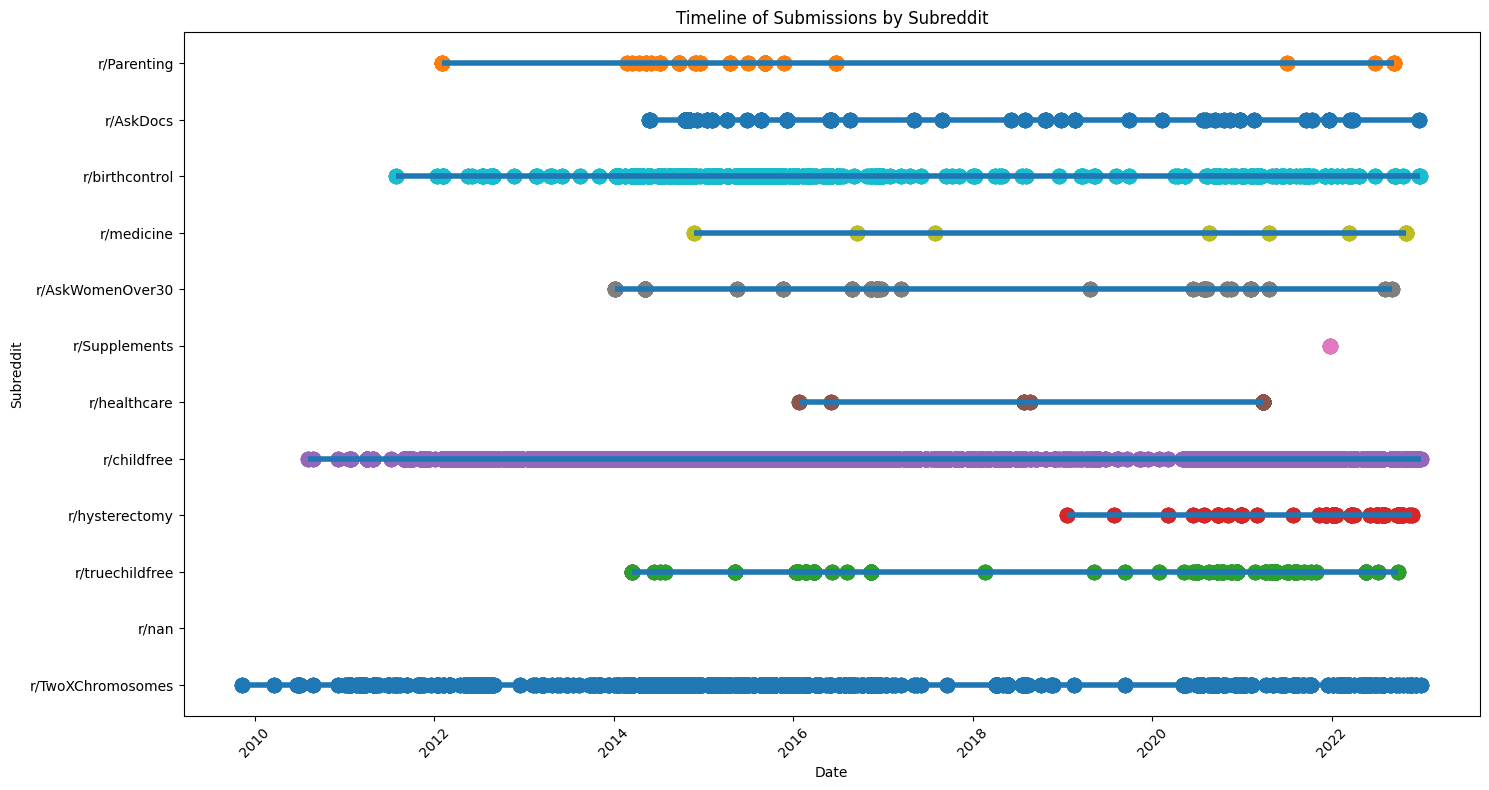

In [121]:
# Create figure with larger size
plt.figure(figsize=(15, 8))
# Get unique subreddits
subreddits = all_files['subreddit_submission'].unique()
# Create timeline for each subreddit
for i, subreddit in enumerate(subreddits):
    subreddit_data = all_files[all_files["subreddit_submission"] == subreddit]
    # Get min and max dates
    min_date = subreddit_data['created_utc_submission'].min()
    max_date = subreddit_data['created_utc_submission'].max()
    
    # Plot horizontal line for the date range
    plt.hlines(y=i, xmin=min_date, xmax=max_date, linewidth=4)
    # Add points for individual submissions
    plt.scatter(subreddit_data['created_utc_submission'], [i] * len(subreddit_data), s=100,
               alpha=1, label=f"Posts in r/{subreddit}")
# Customize the plot
plt.yticks(range(len(subreddits)), [f"r/{s}" for s in subreddits])
plt.xlabel('Date')
plt.ylabel('Subreddit')
plt.title('Timeline of Submissions by Subreddit')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

In [122]:
#Separate data r/childfree and r/birthcontrol and r/TwoXChromosomes into a subset
subsetCFBC_data = all_files[(all_files['subreddit_submission'] == 'childfree') | (all_files['subreddit_submission'] == 'birthcontrol')|(all_files['subreddit_submission'] == 'TwoXChromosomes')]

subsetCFBC_data.head(5)

id_submission name created_utc_submission  \
0         a321r  NaN    2009-11-11 00:44:34   
1         beu6w  NaN    2010-03-18 04:39:55   
2         chhhi  NaN    2010-06-21 21:33:37   
3         cjo99  NaN    2010-06-28 01:25:43   
4         cknwk  NaN    2010-06-30 19:47:49   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment body  \
0         [deleted]        NaN               NaN                 NaT  NaN   
1            _Kita_        NaN               NaN                 NaT  NaN   
2         drugsrbad        NaN               NaN                 NaT  NaN   
3          Deviant1        NaN               NaN                 NaT  NaN   
4        Bantam_Fox        NaN               NaN                 NaT  NaN   

  link_id parent_id author_comment  
0     NaN       NaN            NaN  
1     NaN       NaN            NaN  
2     NaN       NaN            NaN  
3     NaN       NaN            NaN  
4     NaN       NaN            NaN

/var/folders/lz/3dhhqmvn2ksf1gl3c61trx4r0000gn/T/ipykernel_95270/4170366548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year


<Figure size 1000x600 with 0 Axes>

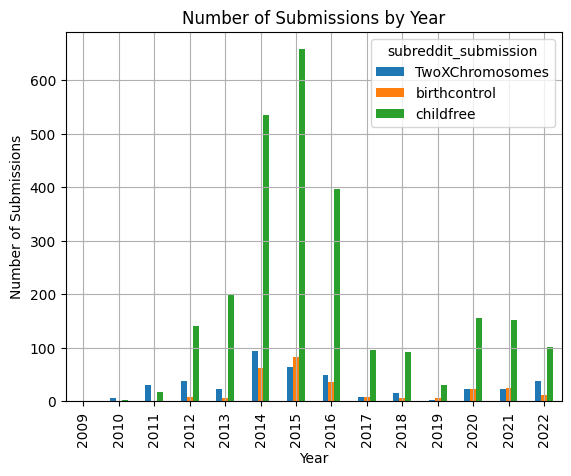

In [123]:
# Extract the year from 'submission_time'
subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year

# Group by year and count the number of submissions
submission_counts_by_year = subsetCFBC_data.groupby(['year', 'subreddit_submission'])['id_submission'].nunique().unstack()

# Plot the results
plt.figure(figsize=(10, 6))
submission_counts_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.title('Number of Submissions by Year')
plt.grid(True)
plt.show()

In [124]:
# average length of comment body
# Calculate average length of comment body
all_files['body_length'] = all_files['body'].str.len()
average_length = all_files['body_length'].mean()
print(f"Average comment length: {average_length:.2f} characters")

# If you want to see the distribution
print("\nComment length statistics:")
print(all_files['body_length'].describe())

Average comment length: 376.77 characters

Comment length statistics:
count    267228.000000
mean        376.766248
std         578.256463
min           1.000000
25%          98.000000
50%         219.000000
75%         444.000000
max       10066.000000
Name: body_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

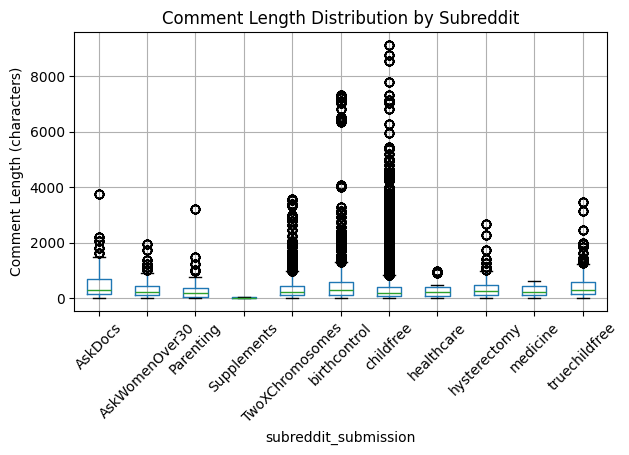

In [125]:
# Calculate comment length statistics by subreddit
subreddit_stats = all_files.groupby('subreddit_submission').agg({
    'body_length': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

# a visual comparison
plt.figure(figsize=(10, 6))
all_files.boxplot(column='body_length', by='subreddit_submission', rot=45)
plt.title('Comment Length Distribution by Subreddit')
plt.ylabel('Comment Length (characters)')
plt.suptitle('')  # removes the automatic suptitle
plt.tight_layout()
plt.show()

only start with original post (submissions)? what is the most efficient way to get this subset?

Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)

In [126]:
#Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)
essure_pattern = r'\bEssure\b|\bessure\b'
essure_submissions = all_files[
        all_files['title'].str.contains(essure_pattern, regex=True, case=True, na=False) |
        all_files['selftext'].str.contains(essure_pattern, regex=True, case=True, na=False)]
essure_submissions.head(10)

id_submission      name created_utc_submission  \
0         a321r       NaN    2009-11-11 00:44:34   
1         beu6w       NaN    2010-03-18 04:39:55   
2         chhhi       NaN    2010-06-21 21:33:37   
3         cjo99       NaN    2010-06-28 01:25:43   
4         cknwk       NaN    2010-06-30 19:47:49   
5         clroh       NaN    2010-07-04 01:58:21   
6         d4g5a       NaN    2010-08-23 15:33:55   
7         efv0c       NaN    2010-12-03 22:51:15   
8         g3ca7  t3_g3ca7    2011-03-13 23:15:38   
9         g3ca7  t3_g3ca7    2011-03-13 23:15:38   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   
5  Did anyone of you guys had sterilization couns...   
6  My Essure (permanent sterilization) Experience...   
7  Follow-up on "My Essure Experience" - HSG exam...   
8  Is it just me, or is this commerical for Essur...   
9  Is it just me, or is this commerical for Essur...   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5  I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6  I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7  [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                NaN      TwoXChromosomes   
9                                                NaN      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment  \
0         [deleted]        NaN               NaN                 NaT   
1            _Kita_        NaN               NaN                 NaT   
2         drugsrbad        NaN               NaN                 NaT   
3          Deviant1        NaN               NaN                 NaT   
4        Bantam_Fox        NaN               NaN                 NaT   
5     valentinedoux        NaN               NaN                 NaT   
6     valentinedoux        NaN               NaN                 NaT   
7     valentinedoux        NaN               NaN                 NaT   
8           caecias    c1kmai8   TwoXChromosomes 2011-03-13 23:28:29   
9           caecias    c1kmmrw   TwoXChromosomes 2011-03-14 00:54:17   

                                                body   link_id   parent_id  \
0                                                NaN       NaN         NaN   
1                                                NaN       NaN         NaN   
2                                                NaN       NaN         NaN   
3                                                NaN       NaN         NaN   
4                                                NaN       NaN         NaN   
5                                                NaN       NaN         NaN   
6                                                NaN       NaN         NaN   
7                                                NaN       NaN         NaN   
8  "Funny Video"? It's reinforcing so much patria...  t3_g3ca7    t3_g3ca7   
9  Although I agree with you on the whole, I don'...  t3_g3ca7  t1_c1kmai8   

  author_comment  body_length  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
5            NaN          NaN  
6            NaN          NaN  
7            NaN          NaN  
8         miohio        

In [127]:
#Create filtered dataframe for comments that contain the word Essure (from the allfiles df)
#Filter out comments that don't contain the word Essure (title or subtext) (from the allfiles df)
#essure_pattern = r'\bEssure\b|\bessure\b'
#essure_comments = all_files[
        #all_files['body'].str.contains(essure_pattern, regex=True, case=True, na=False)]
       
#essure_comments.head(10)

In [128]:
# Drop duplicates based on title and keep only relevant columns
essure_submissions = essure_submissions.drop_duplicates(subset=['title'])[['title', 'selftext', 'subreddit_submission', 'created_utc_submission']]

In [129]:
essure_submissions.head(10)

title  \
0   Essure - did you know about this form of perma...   
1   Anyone have experience with Essure? I'm consid...   
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
8   Is it just me, or is this commerical for Essur...   
27  Have any 2xers had Essure placed as birth cont...   

                                             selftext subreddit_submission  \
0                                           [deleted]      TwoXChromosomes   
1                                                 NaN      TwoXChromosomes   
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                 NaN      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   

   created_utc_submission  
0     2009-11-11 00:44:34  
1     2010-03-18 04:39:55  
2     2010-06-21 21:33:37  
3     2010-06-28 01:25:43  
4     2010-06-30 19:47:49  
5     2010-07-04 01:58:21  
6     2010-08-23 15:33:55  
7     2010-12-03 22:51:15  
8     2011-03-13 23:15:38  
27    2011-03-18 17:14:50

In [130]:
#Drop (comment) duplicates based on body and keep only relevant columns
#essure_comments = essure_comments.drop_duplicates(subset=['body'])[['body', 'subreddit_comment', 'created_utc_comment']]

# process text

In [131]:
import nltk

In [132]:
#Download the necessary resources
# only needs to run once
nltk.download('punkt') # tokenizer
nltk.download('punkt_tab') 
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatizer


[nltk_data] Downloading package punkt to /Users/arama1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/arama1/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arama1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arama1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:
# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [134]:
custom_stopwords = pd.read_csv('../Stopwords.txt', header=None, names=['words'])['words'].tolist()

In [135]:
print("Custom Stopwords:")
print(custom_stopwords)

Custom Stopwords:
['Essure', 'essure', nan, 'Nan', 'http', 'would', 'quite', 'make', 'get', 'go', 'could', 'getting', 'deleted']


In [136]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):  # Check if text is not a string
        text = str(text)  # Convert it to string
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    #Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

In [137]:
# Apply preprocessing to the 'title' and 'selftext' columns 
essure_submissions['Processed_selftext'] = essure_submissions['selftext'].apply(preprocess_text)

In [138]:
essure_submissions.head(10)

title  \
0   Essure - did you know about this form of perma...   
1   Anyone have experience with Essure? I'm consid...   
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
8   Is it just me, or is this commerical for Essur...   
27  Have any 2xers had Essure placed as birth cont...   

                                             selftext subreddit_submission  \
0                                           [deleted]      TwoXChromosomes   
1                                                 NaN      TwoXChromosomes   
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                 NaN      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   

   created_utc_submission                                 Processed_selftext  
0     2009-11-11 00:44:34                                                     
1     2010-03-18 04:39:55                                                nan  
2     2010-06-21 21:33:37  background live somewhat progressive parent st...  
3     2010-06-28 01:25:43  firmly decided never child came across option ...  
4     2010-06-30 19:47:49  ok turn next month husband sure ever want kid ...  
5     2010-07-04 01:58:21  appointment planned parenthood morning pap sme...  
6     2010-08-23 15:33:55  live southern california know watch youtube ju...  
7     2010-12-03 22:51:15  original post experience consultation procedur...  
8     2011-03-13 23:15:38                                                nan  
27    2011-03-18 17:14:50       think still fairly rare u guessing love hear

## We remove the empty rows in ['Processed_selftext']

In [139]:
# Remove rows where Processed_selftext is 'nan' (string 'nan') or empty
essure_submissions = essure_submissions[
    (essure_submissions['Processed_selftext'] != 'nan') & 
    (essure_submissions['Processed_selftext'].notna()) &  # removes NaN values
    (essure_submissions['Processed_selftext'] != '')  # removes empty strings
]

In [140]:
essure_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 2 to 259755
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   1232 non-null   object        
 1   selftext                1232 non-null   object        
 2   subreddit_submission    1232 non-null   object        
 3   created_utc_submission  1232 non-null   datetime64[ns]
 4   Processed_selftext      1232 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 57.8+ KB


## Does it make sense to clean up the title as well? or combine the cleand title and selftext?

In [141]:
essure_submissions['Processed_title'] = essure_submissions['title'].apply(preprocess_text)

In [142]:
essure_submissions['title_selftext'] = essure_submissions['title'] + ' ' + essure_submissions['selftext']
essure_submissions['Processed_title_selftext'] = essure_submissions['title_selftext'].apply(preprocess_text)

In [143]:
essure_submissions.head(10)


title  \
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
27  Have any 2xers had Essure placed as birth cont...   
32         Has anyone had the procedure Essure done?    
48  I was all ready to get the Essure procedure do...   
51  Ladies, anyone tried this method of BC? Or any...   

                                             selftext subreddit_submission  \
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   
32  Here is he link:\nhttp://www.essure.com/ for t...      TwoXChromosomes   
48  It completely changed my mind. I had been putt...      TwoXChromosomes   
51  http://www.essure.com/\n\n\nEdit: yours.\n\nI ...      TwoXChromosomes   

   created_utc_submission                                 Processed_selftext  \
2     2010-06-21 21:33:37  background live somewhat progressive parent st...   
3     2010-06-28 01:25:43  firmly decided never child came across option ...   
4     2010-06-30 19:47:49  ok turn next month husband sure ever want kid ...   
5     2010-07-04 01:58:21  appointment planned parenthood morning pap sme...   
6     2010-08-23 15:33:55  live southern california know watch youtube ju...   
7     2010-12-03 22:51:15  original post experience consultation procedur...   
27    2011-03-18 17:14:50       think still fairly rare u guessing love hear   
32    2011-04-30 02:52:36  link know married mid kid mind one kid adopted...   
48    2012-03-04 16:33:30  completely changed mind putting relatively new...   
51    2012-06-19 14:52:24  edit got pregnant complete accident miscarried...   

                                      Processed_title  \
2                              age minimum litigation   
3              experience transcervical sterilization   
4                             good gynecologist story   
5                 anyone guy sterilization counseling   
6   permanent sterilization experience consultatio...   
7                    experience hsg exam verification   
27  placed birth control please discus placement w...   
32                              anyone procedure done   
48  ready procedure done made horrible mistake goo...   
51  lady anyone tried method bc friend since perma...   

                                       title_selftext  \
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4   A good gynecologist story! Ok, so, I turn 25 n...   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
27  Have any 2xers had Essure placed as birth cont...   
32  Has anyone had the procedure Essure done?  Her...   
48  I was all ready to get the Essure procedure do...   
51  Ladies, anyone tried this method of BC? Or any...   

                             Processed_title_selftext  
2   age minimum litigation background live somewha...  
3   experience transcervical sterilization firmly ...  
4   good gynecologist story ok turn next month hus...  
5   anyone guy sterilization counseling appointmen...  
6   permanent sterilization experience consultatio...  
7   experience hsg exam verification original post...  
27  placed birth control please 

In [144]:
#Apply preprocessing to the 'body' column
#essure_comments['Processed_body'] = essure_comments['body'].apply(preprocess_text)
#essure_comments.head(10)

#Remove rows where Processed_body is 'nan' (string 'nan') or empty
#essure_comments = essure_comments[
    #(essure_comments['Processed_body'] != 'nan') & 
    #(essure_comments['Processed_body'].notna()) &  # removes NaN values
    #(essure_comments['Processed_body'] != '')  # removes empty strings

#essure_comments.head(10)

In [145]:
#Get a random 10% of the essure_submissions
sub_subset = essure_submissions.sample(frac=0.1, random_state=1) # 10% sample

#Verify the size of the subset
print(f"Subset size: {len(sub_subset)}")
print(sub_subset.head())


# set.seed(123) ?

# save the sample into a csv file
sub_subset.to_csv('sub_subset_sample.csv', index=False)

print("Sample saved to 'sub_subset_sample.csv'")

Subset size: 123
                                                   title  \
13664  Does anyone have any experience with the Essur...   
6892   Update - Essure confirmation/dye test procedur...   
12415        Finally time to post: Got sterilized Today!   
13574  Another Denial for Essure, but Still a Good Ex...   
9537                         Essure with nickel allergy?   

                                                selftext subreddit_submission  \
13664  I have an appointment with my nurse practition...            childfree   
6892   [Original post] (http://www.reddit.com/r/child...            childfree   
12415  I didn't want to post this, until the actual p...            childfree   
13574  So I saw another gyno today whom I was told wo...            childfree   
9537   Saw a new obgyn on list.i told him I wanted tu...            childfree   

      created_utc_submission  \
13664    2018-02-06 05:12:19   
6892     2014-12-15 17:02:37   
12415    2016-05-28 03:53:58   
13574  

In [146]:
#Get a random 10% of the essure_comments
#comment_subset = essure_comments.sample(frac=0.1, random_state=1) # 10% sample

#Verify the size of the subset
#print(f"Subset size: {len(comment_subset)}")

#save the sample into a csv file
#comment_subset.to_csv('comment_subset_sample.csv', index=False)
#print("Sample saved to 'comment_subset_sample.csv'")

text data representation: consider word frequency, TFIDF, embeddings

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [148]:
#Text data representation in processed selftext 
vectorizer = CountVectorizer(ngram_range=(1, 5))
x_bow = vectorizer.fit_transform(essure_submissions['Processed_selftext'])

print("Feature Names Submissions Selftext")
print(vectorizer.get_feature_names_out())

print("\nBag of Words Matrix Submissions Selftext")
print(x_bow.toarray())

Feature Names Submissions Selftext
['aa' 'aa aa' 'aa aa iub' ... 'zthea sir doctor' 'zthea sir doctor okay'
 'zthea sir doctor okay want']

Bag of Words Matrix Submissions Selftext
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [149]:
#Text data representation in processed title - should this be combined with selftext?
#vectorizer = CountVectorizer(ngram_range=(1, 5))
#title_bow = vectorizer.fit_transform(essure_submissions['Processed_title'])
#print("Feature Names Submissions Title")
#print(vectorizer.get_feature_names_out())
#print("\nBag of Words Matrix Submissions Title")
#print(x_bow.toarray())

In [150]:
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
bow_array = x_bow.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# Display the first few rows and columns
print("\nBag-of-Words Representation Submissions Selftext (first 5 documents, first 10 features):")
print(bow_df.iloc[:5, :10])

# If you want to see all features for a specific document:
doc_index = 0
print(f"\nAll features for document {doc_index}:")
print(bow_df.iloc[doc_index].loc[bow_df.iloc[doc_index] != 0].sort_values(ascending=False))


Bag-of-Words Representation Submissions Selftext (first 5 documents, first 10 features):
   aa  aa aa  aa aa iub  aa aa iub copper  aa aa iub copper official  \
0   0      0          0                 0                          0   
1   0      0          0                 0                          0   
2   0      0          0                 0                          0   
3   0      0          0                 0                          0   
4   0      0          0                 0                          0   

   aa always  aa always listened  aa always listened say  \
0          0                   0                       0   
1          0                   0                       0   
2          0                   0                       0   
3          0                   0                       0   
4          0                   0                       0   

   aa always listened say woman  aa iub  
0                             0       0  
1                             0 

In [151]:
word_freq = bow_df.sum().sort_values(ascending=False)
print("\nTop 100 Most Frequent Terms Submissions Selftext:")

pd.set_option('display.max_rows', None)

print(word_freq.head(100))


Top 100 Most Frequent Terms Submissions Selftext:
want              1457
doctor            1435
like              1123
procedure         1089
year               973
one                948
know               907
time               865
kid                843
child              802
said               701
even               695
really             676
got                674
also               672
day                660
told               623
done               611
tubal              593
woman              588
pain               583
going              574
never              574
iud                562
birth              553
control            548
surgery            545
feel               535
month              535
went               530
back               511
wanted             500
birth control      498
thing              497
sure               490
since              475
think              472
still              469
much               467
sterilization      465
first              463
take  

In [152]:
#Text data representation in processed title - should this be combined with selftext?

#vectorizer = CountVectorizer(ngram_range=(1, 5))
#title_bow = vectorizer.fit_transform(essure_submissions['Processed_title'])

#print("Feature Names Submissions Title")
#print(vectorizer.get_feature_names_out())

#print("\nBag of Words Matrix Submissions Title")
#print(title_bow.toarray())

#title_feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
#title_bow_array = title_bow.toarray()

# Create a DataFrame
#title_bow_df = pd.DataFrame(title_bow_array, columns=title_feature_names)

# Display the first few rows and columns
#print("\nBag-of-Words Representation Submissions Title (first 5 documents, first 10 features):")
#print(title_bow_df.iloc[:5, :10])

# If you want to see all features for a specific document:
#doc_index = 0
#print(f"\nAll features for document {doc_index}:")
#print(title_bow_df.iloc[doc_index].loc[title_bow_df.iloc[doc_index] != 0].sort_values(ascending=False))

In [153]:
#Text data representation in processed body
#vectorizer = CountVectorizer(ngram_range=(1, 5))
#com_bow = vectorizer.fit_transform(essure_comments['Processed_body'])

#print("Feature Names Comments")
#print(vectorizer.get_feature_names_out())

#print("\nBag of Words Matrix Comments")
#print(com_bow.toarray())

#com_feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
#com_bow_array = com_bow.toarray()

# Create a DataFrame
#com_bow_df = pd.DataFrame(com_bow_array, columns=feature_names)

# Display the first few rows and columns
#print("\nBag-of-Words Representation Comments (first 5 documents, first 10 features):")
#print(com_bow_df.iloc[:5, :10])

# If you want to see all features for a specific document:
#doc_index = 0
#print(f"\nAll features for document {doc_index}:")
#print(com_bow_df.iloc[doc_index].loc[com_bow_df.iloc[doc_index] != 0].sort_values(ascending=False))

In [154]:
# most frequent n-grams - Submissions Selftext
# Get n-grams where n > 1 (features containing spaces)
ngram_freq = bow_df.loc[:, bow_df.columns.str.contains(' ')].sum().sort_values(ascending=False)

# Print top n-grams
print("Most frequent n-grams Submissions Selftext (n > 1):")
print(ngram_freq.head(50))

Most frequent n-grams Submissions Selftext (n > 1):
birth control              498
tubal ligation             262
want kid                   202
change mind                169
side effect                145
year old                   145
amp amp                    140
want child                 134
feel like                  126
procedure done             125
fallopian tube             118
planned parenthood         111
amp amp amp                 99
year ago                    96
even though                 91
copper iud                  79
hormonal birth              76
permanent birth             75
hormonal birth control      75
tube tied                   73
permanent birth control     73
anyone else                 65
bilateral salpingectomy     65
first time                  64
tl dr                       63
really want                 62
felt like                   61
amp amp amp amp             61
horror story                58
month ago                   57
know want         

In [155]:
#TFIDF representation for Submissions Selftext
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
x_tfidf = tfidf_vectorizer.fit_transform(essure_submissions['Processed_selftext']) 

print("Feature Names Selftext")
print(tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix Selftext")
print(x_tfidf.toarray())

Feature Names Selftext
['aa' 'aa aa' 'aa aa iub' ... 'zthea sir doctor' 'zthea sir doctor okay'
 'zthea sir doctor okay want']

TF-IDF Matrix Selftext
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#TFIDF representation for Submissions Title (combine with selftext?)
#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
#x_tfidf_title = tfidf_vectorizer.fit_transform(essure_submissions['Processed_title'])

#print("Feature Names Title")
#print(tfidf_vectorizer.get_feature_names_out())

#print("\nTF-IDF Matrix Title")
#print(x_tfidf_title.toarray())

In [ ]:
#TFIDF representation for Comments
#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
#x_tfidf_com = tfidf_vectorizer.fit_transform(essure_comments['Processed_body'])

#print("Feature Names Comments")
#print(tfidf_vectorizer.get_feature_names_out())

#print("\nTF-IDF Matrix Comments")
#print(x_tfidf_com.toarray())

In [158]:
import numpy as np
# TFIDF, feature names, scores Selftext 
# Get feature names and TF-IDF scores directly from the sparse matrix
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(x_tfidf.mean(axis=0)).flatten()

# Create a Series with feature names as index and scores as values
ngram_scores = pd.Series(scores, index=feature_names)

# Filter for n-grams only (containing spaces) and sort
ngram_tfidf = ngram_scores[ngram_scores.index.str.contains(' ')].sort_values(ascending=False)


In [159]:
print("Most important n-grams Selftext (n > 1) by average TF-IDF score:")
print(ngram_tfidf.head(50))

# Also print some statistics
print("\nTotal number of n-grams Selftext:", len(ngram_tfidf))
print("\nScore range:", 
      f"Min: {ngram_tfidf.min():.6f}", 
      f"Max: {ngram_tfidf.max():.6f}")

Most important n-grams Selftext (n > 1) by average TF-IDF score:
birth control              0.005735
tubal ligation             0.003609
want kid                   0.002860
procedure done             0.002669
change mind                0.002435
side effect                0.002394
year old                   0.002321
fallopian tube             0.002270
want child                 0.002132
planned parenthood         0.002091
feel like                  0.001913
year ago                   0.001786
anyone else                0.001652
permanent birth            0.001626
permanent birth control    0.001598
copper iud                 0.001552
even though                0.001547
insurance cover            0.001473
tube tied                  0.001436
hormonal birth             0.001410
hormonal birth control     0.001402
horror story               0.001378
really want                0.001324
month ago                  0.001271
first time                 0.001181
three month                0.001106

In [ ]:
#TFIDF, feature names, scores Title (combine with selftext?)

# Get feature names and TF-IDF scores directly from the sparse matrix
#title_feature_names = tfidf_vectorizer.get_feature_names_out()
#title_scores = np.asarray(x_tfidf_title.mean(axis=0)).flatten()

# Create a Series with feature names as index and scores as values
#title_ngram_scores = pd.Series(title_scores, index=title_feature_names)

# Filter for n-grams only (containing spaces) and sort
#title_ngram_tfidf = title_ngram_scores[title_ngram_scores.index.str.contains(' ')].sort_values(ascending=False)
#print("Most important n-grams Title (n > 1) by average TF-IDF score:")
#print(title_ngram_tfidf.head(50))

# Also print some statistics
#print("\nTotal number of n-grams Title:", len(title_ngram_tfidf))
#print("\nScore range:",
#      f"Min: {title_ngram_tfidf.min():.6f}",
#      f"Max: {title_ngram_tfidf.max():.6f}")

In [ ]:
#TFIDF, feature names, scores Comments

# Get feature names and TF-IDF scores directly from the sparse matrix
#com_feature_names = tfidf_vectorizer.get_feature_names_out()
#com_scores = np.asarray(x_tfidf_com.mean(axis=0)).flatten()

# Create a Series with feature names as index and scores as values
#com_ngram_scores = pd.Series(com_scores, index=com_feature_names)

# Filter for n-grams only (containing spaces) and sort
#com_ngram_tfidf = com_ngram_scores[com_ngram_scores.index.str.contains(' ')].sort_values(ascending=False)
#print("Most important n-grams Comments (n > 1) by average TF-IDF score:")
#print(com_ngram_tfidf.head(50))

# Also print some statistics
#print("\nTotal number of n-grams Comments:", len(com_ngram_tfidf))
#print("\nScore range:",
#      f"Min: {com_ngram_tfidf.min():.6f}",
#      f"Max: {com_ngram_tfidf.max():.6f}")


## TFIDF by year

In [ ]:
essure_submissions['created_utc_submission'] = pd.to_datetime(essure_submissions['created_utc_submission'])

# Extract the year from 'created_utc_submission' #and 'created_utc_comment'
essure_submissions['year'] = essure_submissions['created_utc_submission'].dt.year
#essure_comments['year'] = essure_comments['created_utc_comment'].dt.year

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Dictionary to store TF-IDF vectors by year
tfidf_vectors_by_year = {}

# Group by year and apply the TF-IDF vectorizer to each group - Processed selftext
for year, group in essure_submissions.groupby('year'):
    #Filter out empty or stop-word only documents
    non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
    if not non_empty_group.empty:
        x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
        tfidf_vectors_by_year[year] = x_tfidf

        print(f"\nYear: {year}")
        print("Feature Names Selftext")
        print(tfidf_vectorizer.get_feature_names_out())


with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
    for year, group in essure_submissions.groupby('year'):
        # Filter out empty or stop-word only documents
        non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
        if not non_empty_group.empty:
            x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
            tfidf_vectors_by_year[year] = x_tfidf

            file.write(f"\nYear: {year}\n")
            file.write("Feature Names:\n")
            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")
      



Year: 2010
Feature Names
['able' 'absolutely' 'accident' 'across' 'actually' 'afternoon' 'age'
 'allergic' 'almost' 'already' 'also' 'always' 'anesthesia' 'anesthetic'
 'anesthetist' 'angle' 'ankle' 'annoyed' 'another' 'answered' 'anyone'
 'anything' 'anyway' 'apologized' 'appalled' 'applied' 'appointment'
 'approved' 'arby' 'area' 'argh' 'around' 'arrived' 'arrogant' 'ask'
 'asked' 'asking' 'asks' 'asleep' 'assistant' 'associated' 'assume'
 'assured' 'ate' 'attempted' 'august' 'austin' 'awake' 'away' 'awhile'
 'awkward' 'baby' 'back' 'background' 'bag' 'barbie' 'basically' 'bat'
 'bath' 'beat' 'bed' 'bedridden' 'benefit' 'besides' 'best' 'big' 'birth'
 'bit' 'blanket' 'bleeding' 'bloated' 'blocked' 'blood' 'blue' 'blurry'
 'body' 'booked' 'bottle' 'bottom' 'box' 'boyfriend' 'breath' 'bring'
 'brought' 'building' 'bullshit' 'bunch' 'ca' 'cabbage' 'california'
 'called' 'came' 'cannula' 'car' 'card' 'catheter' 'cervix' 'chance'
 'change' 'changed' 'chart' 'checked' 'child' 'choice' 'ch

In [ ]:
# Group by year and apply the TF-IDF vectorizer to each group - Processed title
#for year, group in essure_submissions.groupby('year'):
    #Filter out empty or stop-word only documents
#    non_empty_group = group[group['Processed_title'].str.strip().astype(bool)]
#    if not non_empty_group.empty:
#        x_tfidf_title = tfidf_vectorizer.fit_transform(non_empty_group['Processed_title'])
#        tfidf_vectors_by_year[year] = x_tfidf_title

#        print(f"\nYear: {year}")
#        print("Feature Names Title")
#        print(tfidf_vectorizer.get_feature_names_out())

#with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
#    for year, group in essure_submissions.groupby('year'):
        # Filter out empty or stop-word only documents
#        non_empty_group = group[group['Processed_title'].str.strip().astype(bool)]
#        if not non_empty_group.empty:
#            x_tfidf_title = tfidf_vectorizer.fit_transform(non_empty_group['Processed_title'])
#            tfidf_vectors_by_year[year] = x_tfidf
#            file.write(f"\nYear: {year}\n")
#            file.write("Feature Names Title:\n")
#            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")



In [ ]:
# Group by year and apply the TF-IDF vectorizer to each group - Processed body
#for year, group in essure_comments.groupby('year'):
    #Filter out empty or stop-word only documents
#    non_empty_group = group[group['Processed_body'].str.strip().astype(bool)]
#    if not non_empty_group.empty:
#        x_tfidf_com = tfidf_vectorizer.fit_transform(non_empty_group['Processed_body'])
#        tfidf_vectors_by_year[year] = x_tfidf_com

#        print(f"\nYear: {year}")
#        print("Feature Names Comments")
#        print(tfidf_vectorizer.get_feature_names_out())

#with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
#    for year, group in essure_comments.groupby('year'):
        # Filter out empty or stop-word only documents
#        non_empty_group = group[group['Processed_body'].str.strip().astype(bool)]
#        if not non_empty_group.empty:
#            x_tfidf_com = tfidf_vectorizer.fit_transform(non_empty_group['Processed_body'])
#            tfidf_vectors_by_year[year] = x_tfidf
#            file.write(f"\nYear: {year}\n")
#            file.write("Feature Names Comments:\n")
#            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")


# Pre / Post 2015 TFIDF terms

In [ ]:
# Create a period indicator (pre/post 2015) - Submissions
essure_submissions['period'] = essure_submissions['created_utc_submission'].dt.year.apply(
    lambda x: 'pre_2015' if x < 2015 else 'post_2015'
)

In [ ]:
# Create a period indicator (pre/post 2015) - Comments
#essure_comments['period'] = essure_comments['created_utc_comment'].dt.year.apply(
#    lambda x: 'pre_2015' if x < 2015 else 'post_2015'
#)

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer_period = TfidfVectorizer(ngram_range=(1,5))

# First fit the vectorizer on ALL data to learn vocabulary - processed selftext
all_text = essure_submissions['Processed_selftext'].str.strip()
all_text = all_text[all_text.astype(bool)]  # Remove empty texts
tfidf_vectorizer_period.fit(all_text)

# Dictionary to store TF-IDF vectors by period
tfidf_vectors_by_period = {}

# Now transform each period's data using the fitted vectorizer
for period, group in essure_submissions.groupby('period'):
    non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
    if not non_empty_group.empty:
        x_tfidf = tfidf_vectorizer_period.transform(non_empty_group['Processed_selftext'])
        tfidf_vectors_by_period[period] = x_tfidf

# Function to get top terms remains the same
def get_top_terms(tfidf_matrix, vectorizer, n=100):
    feature_names = vectorizer.get_feature_names_out()
    means = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    term_scores = list(zip(feature_names, means))
    df = pd.DataFrame(term_scores, columns=['term', 'score'])
    return df.nlargest(n, 'score')

# Get top terms for each period
for period, matrix in tfidf_vectors_by_period.items():
    print(f"\nTop 100 terms for {period}:")
    top_terms = get_top_terms(matrix, tfidf_vectorizer_period, 100)
    print(top_terms.to_string(index=False))


Top 100 terms for post_2015:
          term    score
       removed 0.016448
        doctor 0.011145
          want 0.010195
          year 0.009228
     procedure 0.008870
          like 0.008366
           one 0.007602
         tubal 0.007433
          know 0.007319
          time 0.007125
           iud 0.007002
           kid 0.006832
          said 0.006648
           got 0.006613
        really 0.006458
          pain 0.006351
         birth 0.006334
         child 0.006329
       control 0.006277
          told 0.006255
          done 0.006242
          also 0.006198
 birth control 0.006133
         month 0.006091
           day 0.006023
       surgery 0.006017
          tube 0.005979
          even 0.005871
         never 0.005838
         woman 0.005663
        option 0.005643
          back 0.005593
         going 0.005512
 sterilization 0.005485
        period 0.005427
   appointment 0.005427
        wanted 0.005253
          went 0.005196
     insurance 0.005181
          

In [ ]:
#Fit the vectorizer on ALL data to learn vocabulary - processed title
#all_text_title = essure_submissions['Processed_title'].str.strip()
#all_text_title = all_text_title[all_text_title.astype(bool)]  # Remove empty texts
#tfidf_vectorizer_period.fit(all_text_title)

# Dictionary to store TF-IDF vectors by period
#tfidf_vectors_by_period_title = {}

# Now transform each period's data using the fitted vectorizer
#for period, group in essure_submissions.groupby('period'):
    #non_empty_group = group[group['Processed_title'].str.strip().astype(bool)]
    #if not non_empty_group.empty:
        #x_tfidf_title = tfidf_vectorizer_period.transform(non_empty_group['Processed_title'])
        #tfidf_vectors_by_period_title[period] = x_tfidf_title

# Get top terms for each period
#for period, matrix in tfidf_vectors_by_period_title.items():
    #print(f"\nTop 100 terms for {period} Title:")
    #top_terms = get_top_terms(matrix, tfidf_vectorizer_period, 100)
    #print(top_terms.to_string(index=False))

In [ ]:
#Fit the vectorizer on ALL data to learn vocabulary - processed body
#all_text_body = essure_comments['Processed_body'].str.strip()
#all_text_body = all_text_body[all_text_body.astype(bool)]  # Remove empty texts
#tfidf_vectorizer_period.fit(all_text_body)

# Dictionary to store TF-IDF vectors by period
#tfidf_vectors_by_period_body = {}

# Now transform each period's data using the fitted vectorizer
#for period, group in essure_comments.groupby('period'):
    #non_empty_group = group[group['Processed_body'].str.strip().astype(bool)]
    #if not non_empty_group.empty:
        #x_tfidf_body = tfidf_vectorizer_period.transform(non_empty_group['Processed_body'])
        #tfidf_vectors_by_period_body[period] = x_tfidf_body

# Get top terms for each period
#for period, matrix in tfidf_vectors_by_period_body.items():
    #print(f"\nTop 100 terms for {period} Body:")
    #top_terms = get_top_terms(matrix, tfidf_vectorizer_period, 100)
    #print(top_terms.to_string(index=False))


In [ ]:
# Compare the periods - Submissions
pre_terms = set(get_top_terms(tfidf_vectors_by_period['pre_2015'], 
                            tfidf_vectorizer_period, 100)['term'])
post_terms = set(get_top_terms(tfidf_vectors_by_period['post_2015'], 
                             tfidf_vectorizer_period, 100)['term'])

print("\nTerms unique to pre-2015:", pre_terms - post_terms)
print("\nTerms unique to post-2015:", post_terms - pre_terms)


Terms unique to pre-2015: {'excited', 'reason', 'baby', 'want kid', 'mind', 'someone', 'made', 'pretty', 'talk', 'young', 'decision', 'covered', 'love', 'change', 'old', 'age', 'change mind', 'many', 'anything', 'vasectomy', 'husband', 'procedure done'}

Terms unique to post-2015: {'side', 'new', 'tubal ligation', 'cf', 'looking', 'sterilized', 'bit', 'issue', 'body', 'risk', 'list', 'last', 'found', 'amp', 'next', 'ago', 'method', 'happy', 'tell', 'removed', 'ligation', 'work'}


# group by sub-reddits

In [91]:
# Create a subreddit group indicator
essure_submissions['subreddit_group'] = essure_submissions['subreddit_submission'].apply(
    lambda x: 'childfree' if x.lower() == 'childfree' else 'other'
)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer_subreddit = TfidfVectorizer(ngram_range=(1,5))

# First fit the vectorizer on ALL data to learn vocabulary
all_text = essure_submissions['Processed_selftext'].str.strip()
all_text = all_text[all_text.astype(bool)]  # Remove empty texts
tfidf_vectorizer_subreddit.fit(all_text)

# Dictionary to store TF-IDF vectors by subreddit group
tfidf_vectors_by_subreddit = {}

# Transform each subreddit group's data using the fitted vectorizer
for group, data in essure_submissions.groupby('subreddit_group'):
    non_empty_group = data[data['Processed_selftext'].str.strip().astype(bool)]
    if not non_empty_group.empty:
        x_tfidf = tfidf_vectorizer_subreddit.transform(non_empty_group['Processed_selftext'])
        tfidf_vectors_by_subreddit[group] = x_tfidf

# Get top terms for each subreddit group
for group, matrix in tfidf_vectors_by_subreddit.items():
    print(f"\nTop 100 terms for {group} subreddits:")
    top_terms = get_top_terms(matrix, tfidf_vectorizer_subreddit, 100)
    print(top_terms.to_string(index=False))

# Compare the groups
childfree_terms = set(get_top_terms(tfidf_vectors_by_subreddit['childfree'], 
                                  tfidf_vectorizer_subreddit, 100)['term'])
other_terms = set(get_top_terms(tfidf_vectors_by_subreddit['other'], 
                               tfidf_vectorizer_subreddit, 100)['term'])

print("\nTerms unique to childfree:", childfree_terms - other_terms)
print("\nTerms unique to other subreddits:", other_terms - childfree_terms)
print("\nCommon terms:", childfree_terms & other_terms)


Top 100 terms for childfree subreddits:
          term    score
        doctor 0.012610
          want 0.011564
     procedure 0.010529
          like 0.009191
           kid 0.008810
       removed 0.008260
          know 0.008071
         child 0.007978
          year 0.007794
           one 0.007595
         tubal 0.007276
          time 0.007180
          done 0.007121
          said 0.007017
        really 0.006641
          told 0.006474
           got 0.006430
          even 0.006328
           iud 0.006298
         going 0.006189
         never 0.006064
         woman 0.005921
          also 0.005898
   appointment 0.005864
     insurance 0.005650
        wanted 0.005616
 sterilization 0.005576
          sure 0.005574
        anyone 0.005540
         birth 0.005373
        option 0.005368
       control 0.005356
        people 0.005333
          went 0.005321
           day 0.005291
         month 0.005271
          feel 0.005233
         think 0.005179
 birth control 0.005106

# Word Clouds

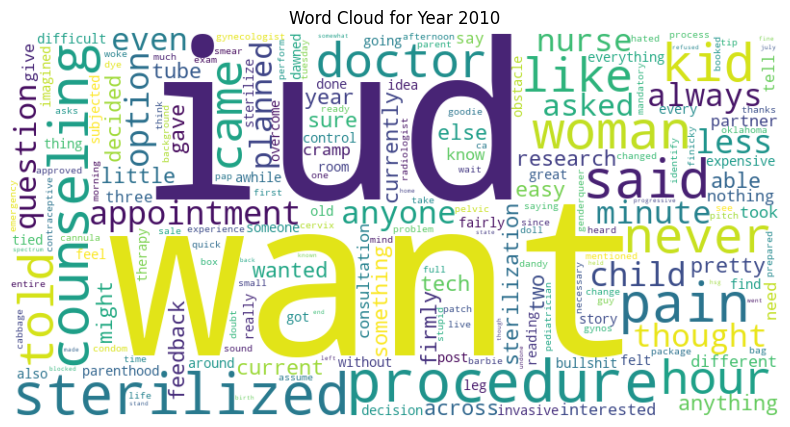

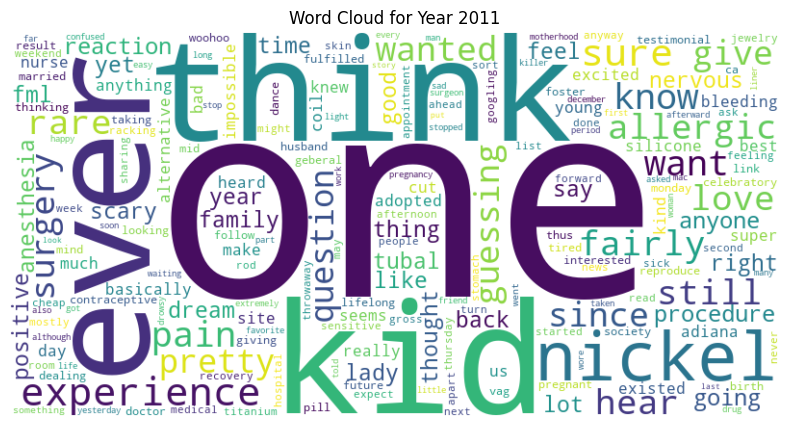

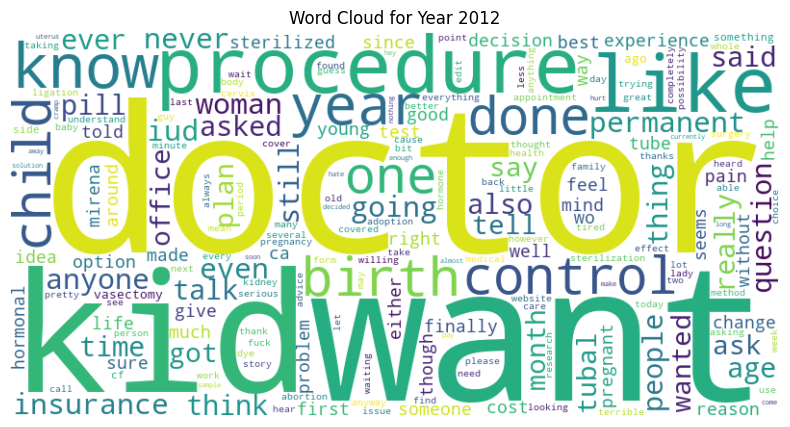

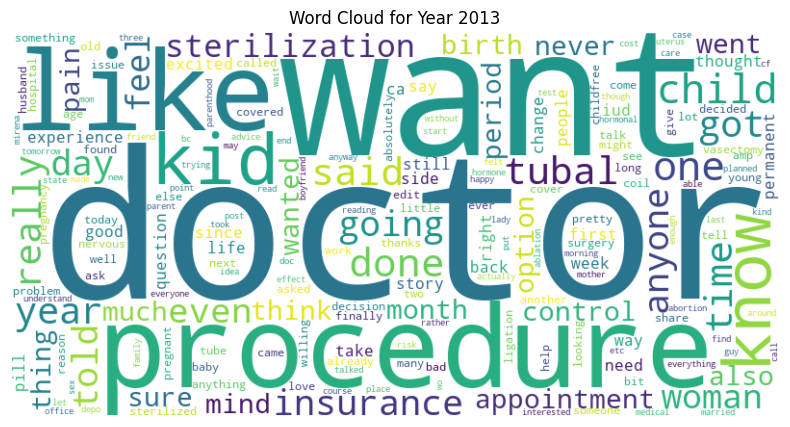

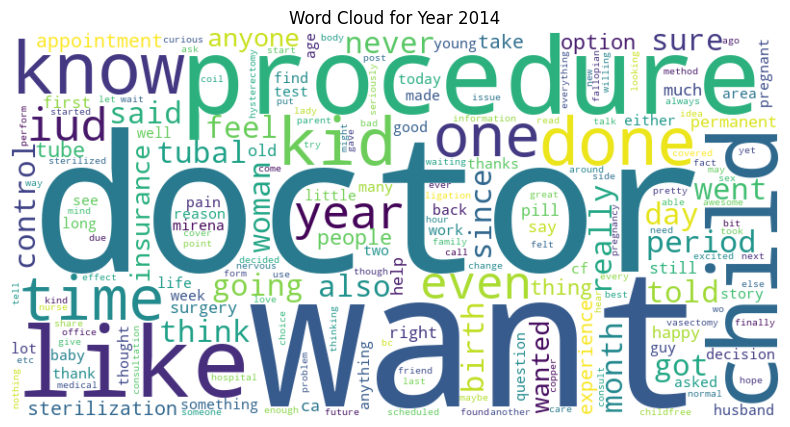

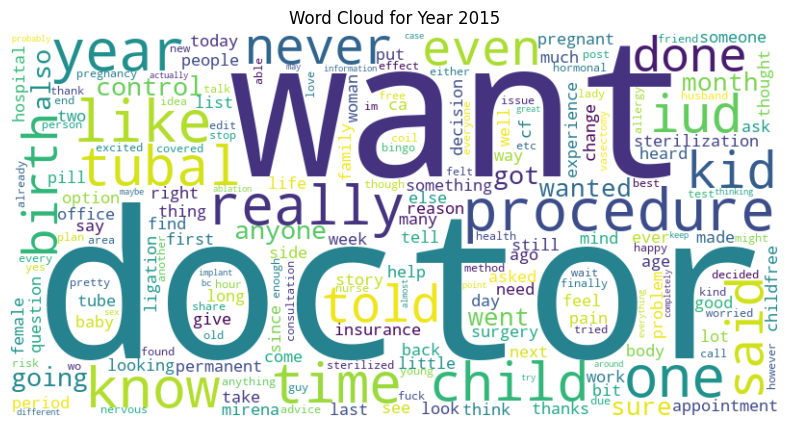

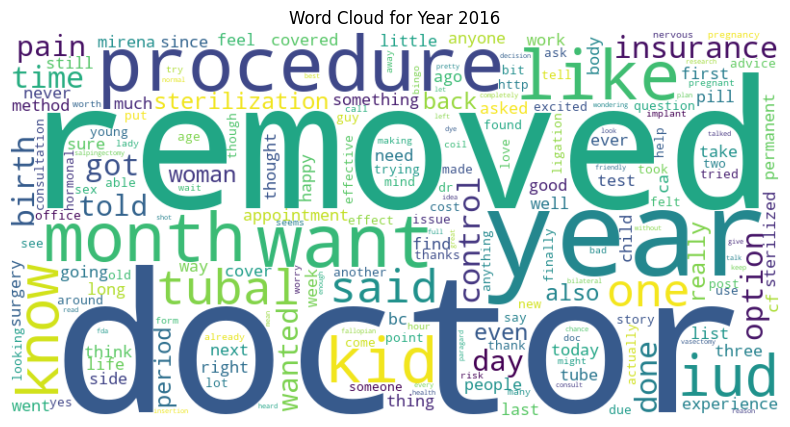

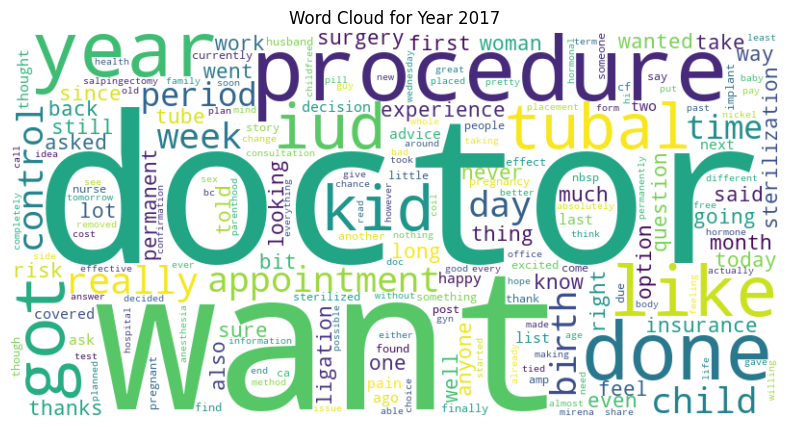

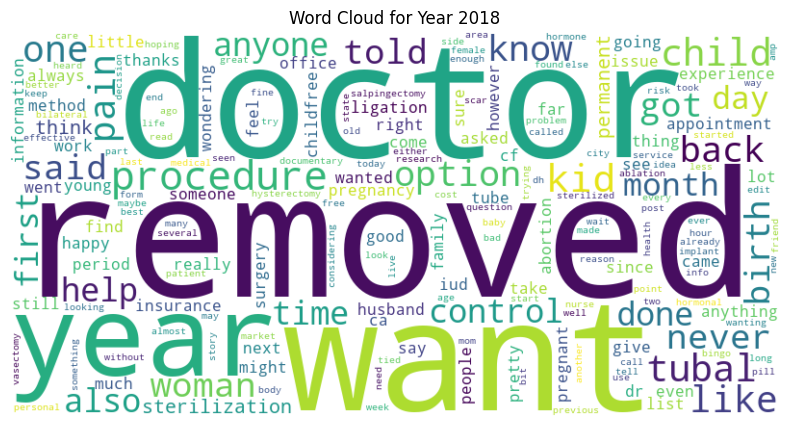

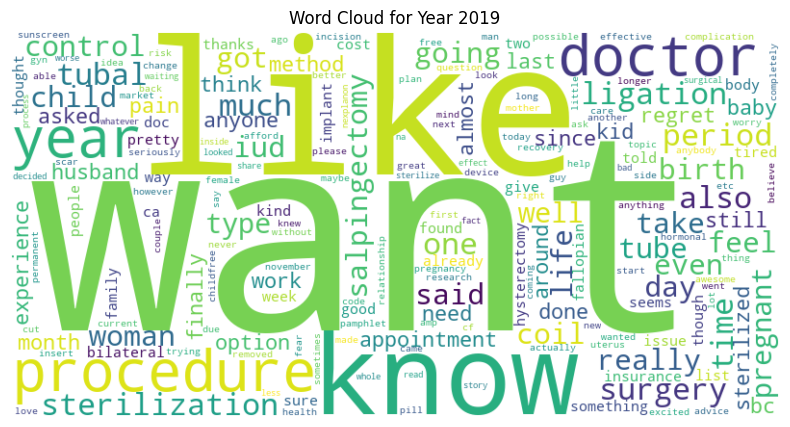

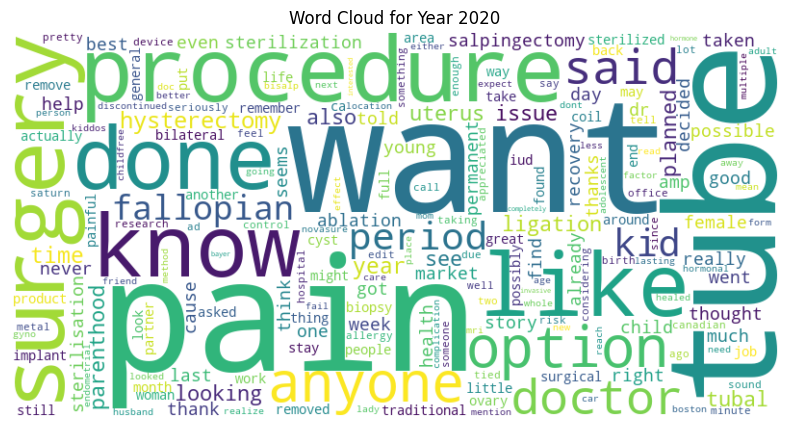

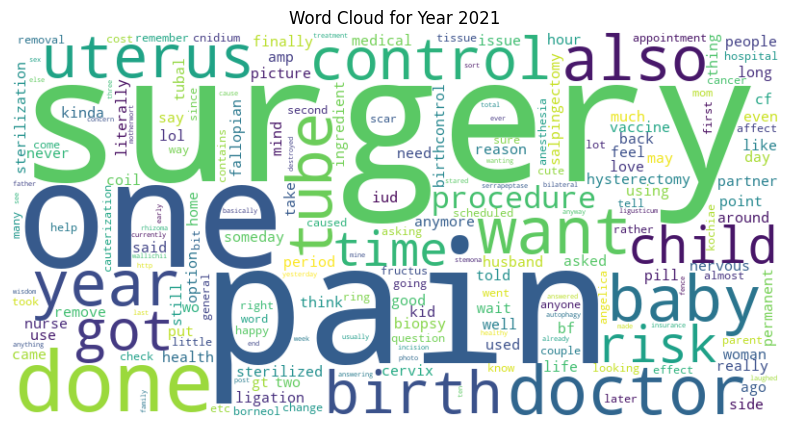

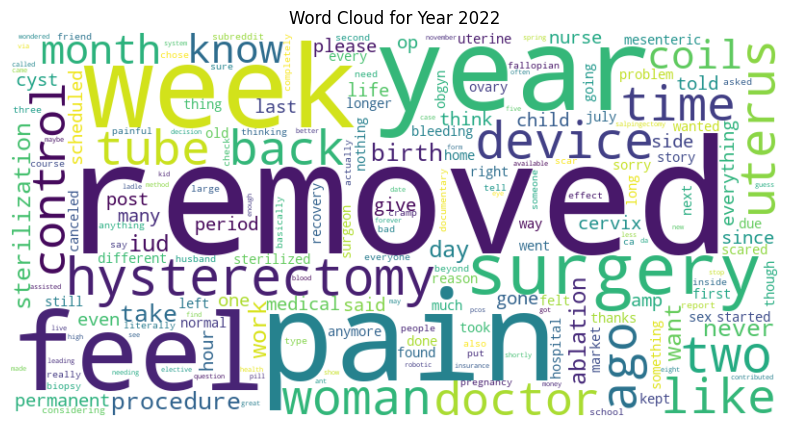

In [92]:
from wordcloud import WordCloud

with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
    for year, group in essure_submissions.groupby('year'):
        non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
        if not non_empty_group.empty:
            x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
            tfidf_vectors_by_year[year] = x_tfidf

            file.write(f"\nYear: {year}\n")
            file.write("Feature Names:\n")
            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")

        # Generate word cloud for the year
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_scores = x_tfidf.sum(axis=0).A1
        word_freq = dict(zip(feature_names, tfidf_scores))
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Year {year}')
        plt.axis('off')
        plt.show()

In [93]:
# Get feature names
#feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
tfidf_array = x_tfidf.toarray()

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf = tfidf_df.mean()

# Sort words by their mean TF-IDF score in descending order
top_words = mean_tfidf.sort_values(ascending=False)

pd.set_option('display.max_rows', None)

print("\nTop 100 Words by Mean TF-IDF Score:")
print(top_words.head(100))


Top 100 Words by Mean TF-IDF Score:
removed          0.098606
pain             0.054984
year             0.048935
week             0.047472
feel             0.045823
surgery          0.042925
hysterectomy     0.036871
two              0.035778
device           0.034025
uterus           0.033069
ago              0.032508
woman            0.032331
time             0.031609
back             0.031233
tube             0.031133
like             0.030703
control          0.029646
doctor           0.029048
month            0.028496
coil             0.027660
know             0.027408
procedure        0.027354
want             0.026328
birth            0.026273
sterilization    0.026064
take             0.025531
never            0.025344
work             0.024993
iud              0.023245
day              0.023158
ablation         0.022851
permanent        0.022529
side             0.022481
since            0.022360
told             0.022341
last             0.022297
post             0.022235
n

## tfidf based wordcloud for all years, all subreddits

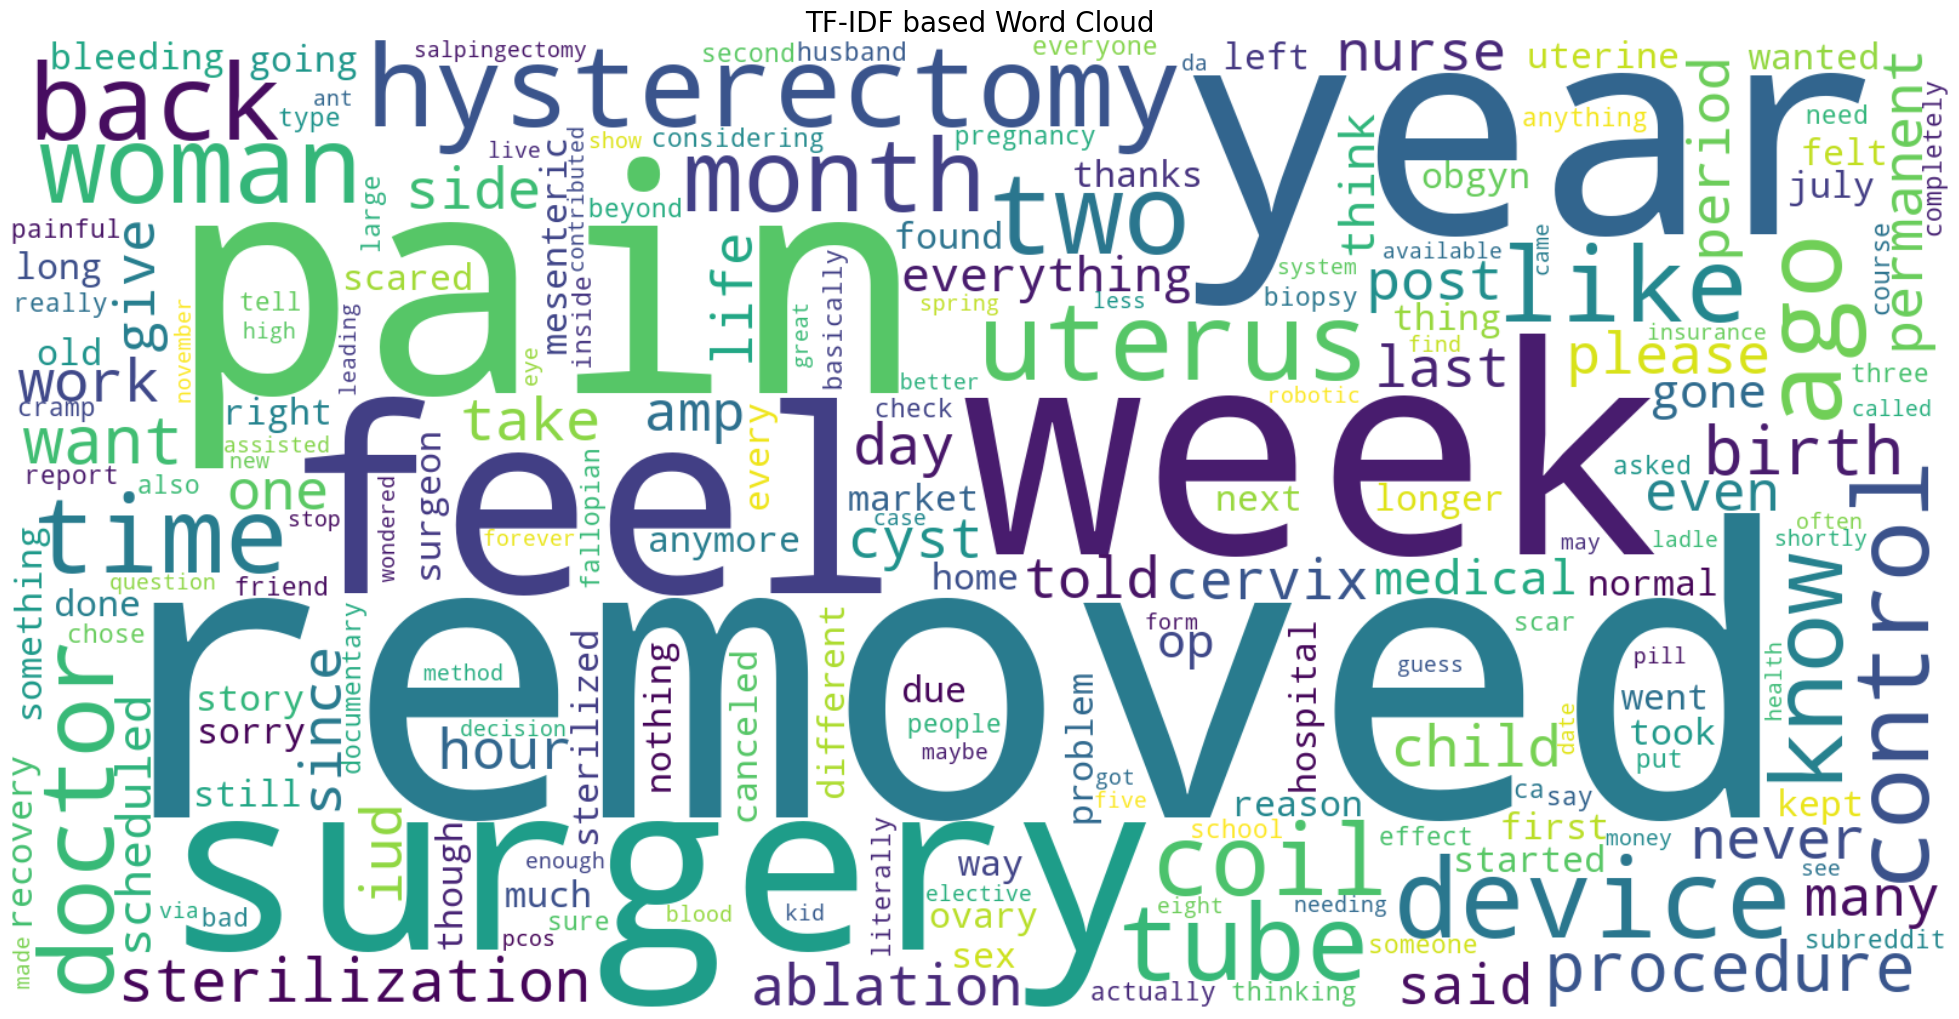

In [94]:
tfidf_dict = top_words.to_dict()
tfidf_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(20, 10))
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF based Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.show()


frequencies of interested terms (sum of raw counts)

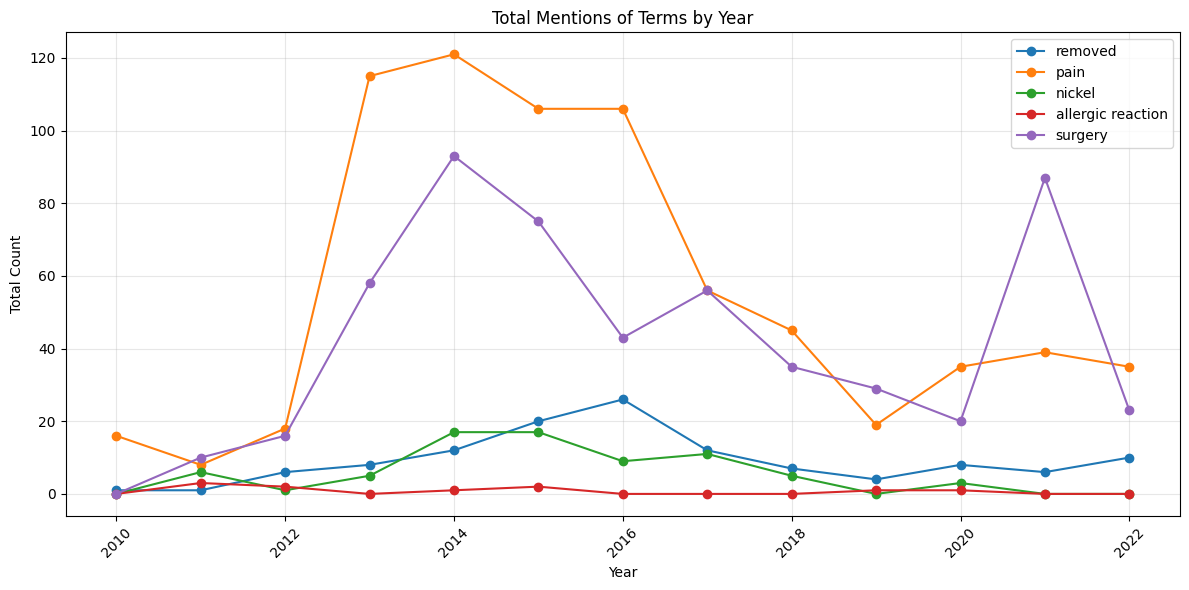


Term counts by year:
      removed  pain  nickel  allergic reaction  surgery
year                                                   
2010        1    16       0                  0        0
2011        1     8       6                  3       10
2012        6    18       1                  2       16
2013        8   115       5                  0       58
2014       12   121      17                  1       93
2015       20   106      17                  2       75
2016       26   106       9                  0       43
2017       12    56      11                  0       56
2018        7    45       5                  0       35
2019        4    19       0                  1       29
2020        8    35       3                  1       20
2021        6    39       0                  0       87
2022       10    35       0                  0       23


In [95]:
# Create DataFrame with total counts for each term by year
term_frequencies = pd.DataFrame()

terms = ['removed', 'pain', 'nickel', 'allergic reaction','surgery']
for term in terms:
    term_frequencies[term] = essure_submissions.groupby('year')['Processed_selftext'].apply(
        lambda x: sum(x.str.count(term.lower()))
    )

plt.figure(figsize=(12, 6))
for term in terms:
    plt.plot(term_frequencies.index, term_frequencies[term], marker='o', label=term)

plt.title('Total Mentions of Terms by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add some padding to the layout
plt.tight_layout()

plt.show()

# Print the actual counts
print("\nTerm counts by year:")
print(term_frequencies)

seeing that spike of 'pain' during 2012-2014.

# some additional questions to explore

### how to sort out frequent/important n-grams?

### what if we separate the dataset by pre/post 2015 and compare TFIDF/word frequency?

### what if grouping by subreddits? with/without 'childfree'?

### shall we look at the comments data as well?